In [28]:
import numpy as np
import pandas as pd
from skimage import io, exposure
from matplotlib import pyplot as plt
%matplotlib inline

import javabridge
import bioformats

In [29]:
train_img_list = pd.read_csv('image_list_train.csv')
test_img_list = pd.read_csv('image_list_test.csv')

In [30]:
train_img_list['path_tiff'][0]

'/home/user/projects/sexton-lab/pytorch_fnet/examples//fovs/6677e50c_3500001004_100X_20170623_5-Scene-1-P24-E06.ome.tiff'

In [31]:
img = io.imread(train_img_list['path_tiff'][1])

(65, 7, 624, 924)
0
780


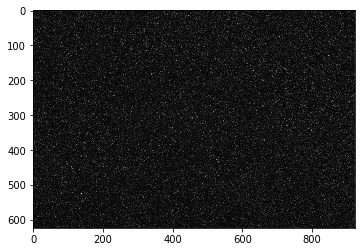

1
13584


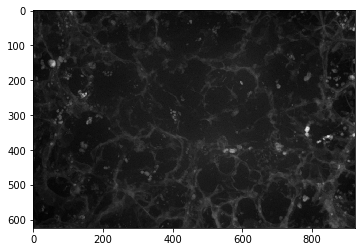

2
535


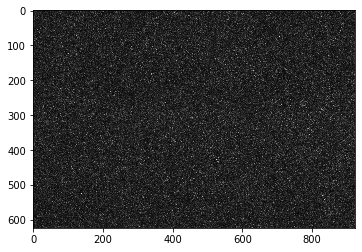

3
1174


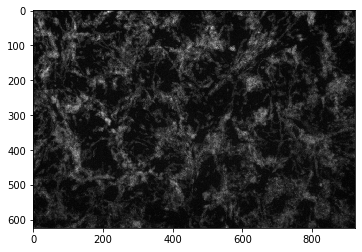

4
507


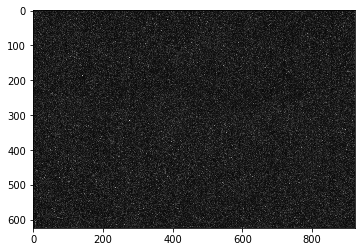

5
2421


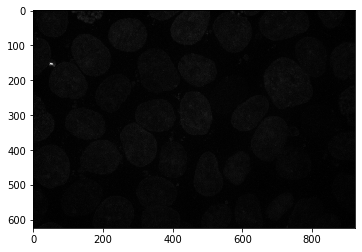

6
65535


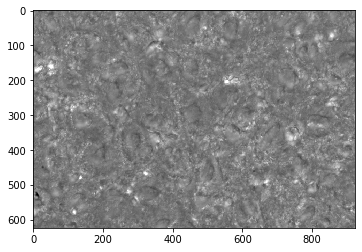

In [32]:
print(img.shape)
for i in range(7):
    print(i)
    ch_mip = np.max(img, axis=0)[i,:,:]
    print(np.max(ch_mip))
    plt.imshow(ch_mip, cmap='gray')
    plt.show()

In [17]:
img = io.imread(test_img_list['path_tiff'][1])

0


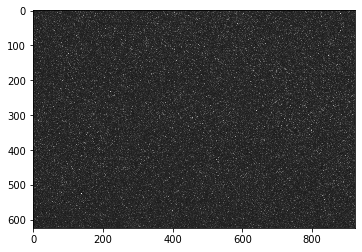

1


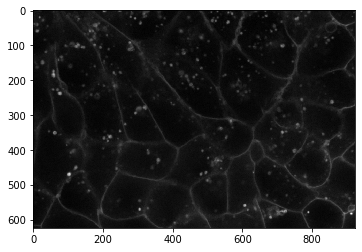

2


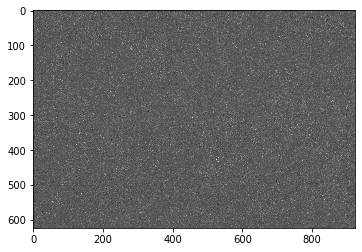

3


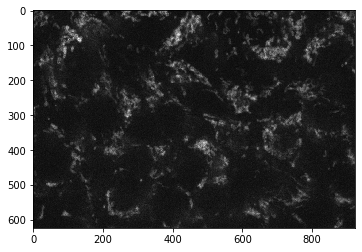

4


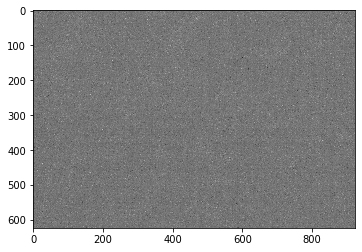

5


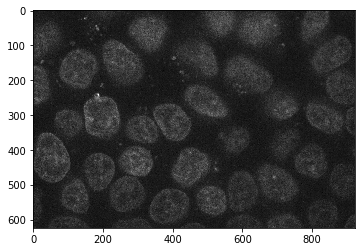

6


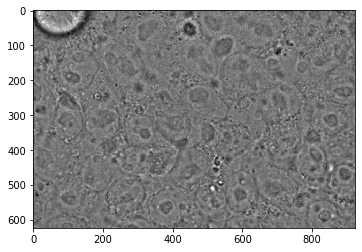

In [18]:
for i in range(7):
    print(i)
    plt.imshow(img[30,i,:,:], cmap='gray')
    plt.show()

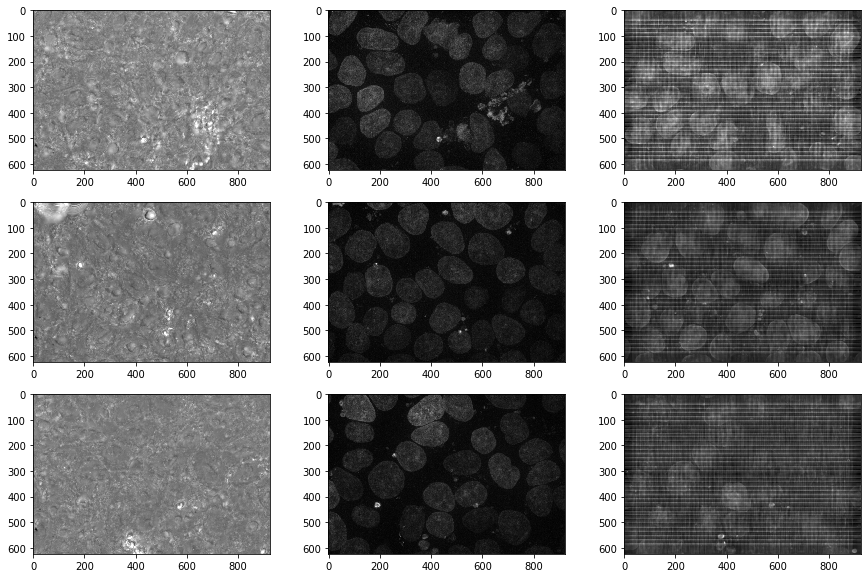

In [33]:
f, axes = plt.subplots(3, 3, figsize=(15,10))
for i in range(3):
    signal = io.imread(f'../examples/predictions/tifs/{i}_signal.tif')
    target = io.imread(f'../examples/predictions/tifs/{i}_target.tif')
    pred = io.imread(f'../examples/predictions/tifs/{i}_prediction_c0..tif')
    axes[i, 0].imshow(np.max(signal, axis=0), cmap='gray')
    axes[i, 1].imshow(np.max(target, axis=0), cmap='gray')
    axes[i, 2].imshow(np.max(pred, axis=0), cmap='gray')
plt.show()

In [3]:

javabridge.start_vm(class_path=bioformats.JARS)

pc_path = '/home/user/storage/sexton_lab/steatosis/MFGTMP_190423170002/MFGTMP_190423170002_A01f00d4.C01'
dapi_path = '/home/user/storage/sexton_lab/steatosis/MFGTMP_190423170002/MFGTMP_190423170002_A01f00d0.C01'

pc_img = bioformats.load_image(pc_path, c=0, z=0, t=0, series=None, index=None,
                 rescale=False, wants_max_intensity=False, channel_names=None)
dapi_img = bioformats.load_image(dapi_path, c=0, z=0, t=0, series=None, index=None,
                 rescale=False, wants_max_intensity=False, channel_names=None)

javabridge.kill_vm()

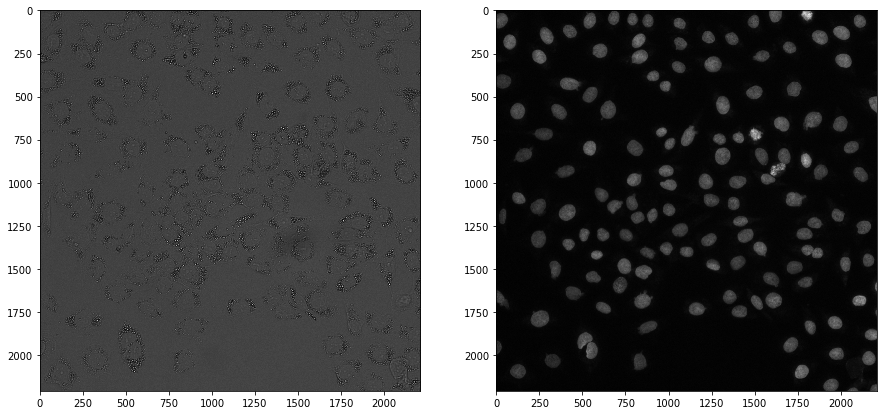

In [4]:
f, axes = plt.subplots(1, 2, figsize=(15,10))
axes[0].imshow(pc_img, cmap='gray')
axes[1].imshow(dapi_img, cmap='gray')
plt.show()

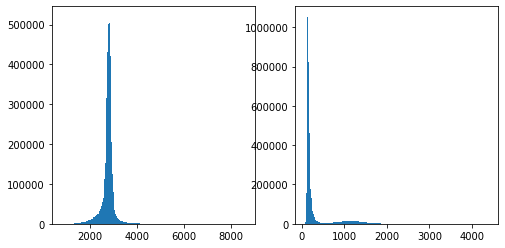

In [5]:
f, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].hist(pc_img.ravel(), bins = 256)
axes[1].hist(dapi_img.ravel(), bins = 256)
plt.show()

In [8]:
print(np.max(pc_img))
print(np.max(dapi_img))

8636
4405


In [19]:
pc_img_scaled = exposure.rescale_intensity(pc_img, in_range='uint12')
dapi_img_scaled = exposure.rescale_intensity(dapi_img, in_range='uint12')
img = np.stack((pc_img_scaled, dapi_img_scaled))

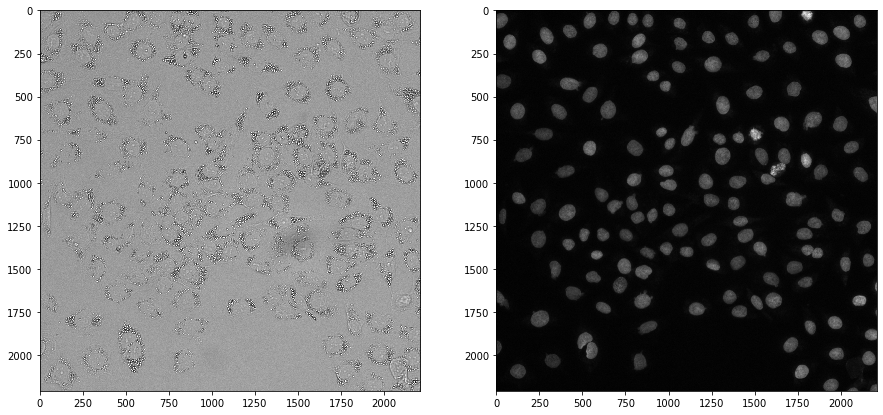

In [20]:
f, axes = plt.subplots(1, 2, figsize=(15,10))
axes[0].imshow(img[0,:,:], cmap='gray')
axes[1].imshow(img[1,:,:], cmap='gray')
plt.show()

65535
65535


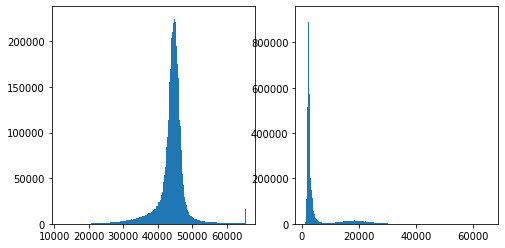

In [21]:
print(np.max(img[0,:,:]))
print(np.max(img[1,:,:]))
f, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].hist(img[0,:,:].ravel(), bins = 256)
axes[1].hist(img[1,:,:].ravel(), bins = 256)
plt.show()

In [16]:
io.imsave('test.tiff', img)

In [27]:
from pathlib import Path
dirs = [x for x in Path('./fovs/').rglob('*') if x.is_file()]
print(dirs)

[PosixPath('fovs/test'), PosixPath('fovs/c679e884_3500001004_100X_20170623_1-Scene-8-P8-E04.ome.tiff'), PosixPath('fovs/4e019af4_3500001004_100X_20170623_8-Scene-6-P45-F06.ome.tiff'), PosixPath('fovs/05321401_3500001004_100X_20170623_8-Scene-7-P46-F06.ome.tiff'), PosixPath('fovs/f8db6147_3500001004_100X_20170623_7-Scene-1-P37-F05.ome.tiff'), PosixPath('fovs/e25c0ee2_3500001004_100X_20170623_3-Scene-03-P12-E05.ome.tiff'), PosixPath('fovs/8e39ca91_3500001004_100X_20170623_5-Scene-3-P26-F05.ome.tiff'), PosixPath('fovs/2cad3afd_3500001004_100X_20170623_5-Scene-6-P29-F05.ome.tiff'), PosixPath('fovs/ed2bddd0_3500001004_100X_20170623_6-Scene-1-P32-F05.ome.tiff'), PosixPath('fovs/6677e50c_3500001004_100X_20170623_5-Scene-1-P24-E06.ome.tiff'), PosixPath('fovs/c12715d4_3500001004_100X_20170623_5-Scene-7-P30-F05.ome.tiff'), PosixPath('fovs/.ipynb_checkpoints/test-checkpoint')]


In [1]:
import gc
gc.collect()

100